In [9]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
sns.set()

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
# Mac이면 아래 줄 주석 해제: plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 통계 라이브러리
from scipy import stats


In [10]:
df = pd.read_excel("./data/퇴사사유.xlsx", sheet_name="데이터")
df.head()



c:\Users\PC\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,연령구분,성별,2017.05,2017.05.1,2017.05.2,2017.05.3,2017.05.4,2017.05.5,2017.05.6,2017.05.7,...,2023.05.6,2023.05.7,2024.05,2024.05.1,2024.05.2,2024.05.3,2024.05.4,2024.05.5,2024.05.6,2024.05.7
0,연령구분,성별,이직 경험자 전체,"근로여건 불만족(보수, 근로시간 등)","개인/가족적이유(건강,육아,결혼등)",전망이 없어서,"전공, 지식, 기술, 적성등이 맞지않아서","임시적, 계절적인 일의 완료, 계약기간 끝남","직장휴업, 폐업, 파산 등",그 외,...,"직장휴업, 폐업, 파산 등",그 외,이직 경험자 전체,"근로여건 불만족(보수, 근로시간 등)","개인/가족적이유(건강,육아,결혼등)",전망이 없어서,"전공, 지식, 기술, 적성등이 맞지않아서","임시적, 계절적인 일의 완료, 계약기간 끝남","직장휴업, 폐업, 파산 등",그 외
1,15~29세,전체,2516,1284,348,180,167,303,60,175,...,55,189,2472,1125,379,190,155,385,59,179
2,NaN,남자,1113,546,120,97,78,150,28,94,...,16,81,1159,515,179,97,77,170,21,100
3,NaN,여자,1403,738,227,83,89,153,31,82,...,38,107,1313,610,200,93,78,215,38,80
4,20~34세,전체,4938,2454,781,358,338,503,140,364,...,109,339,4955,2323,781,378,350,672,119,333


In [11]:
filtered_df = df[(df['연령구분'] == '15~29세') & (df['성별'] == '전체')]


C:\Users\PC\AppData\Local\Temp\ipykernel_6364\207707414.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=labels, y=values, palette="pastel")


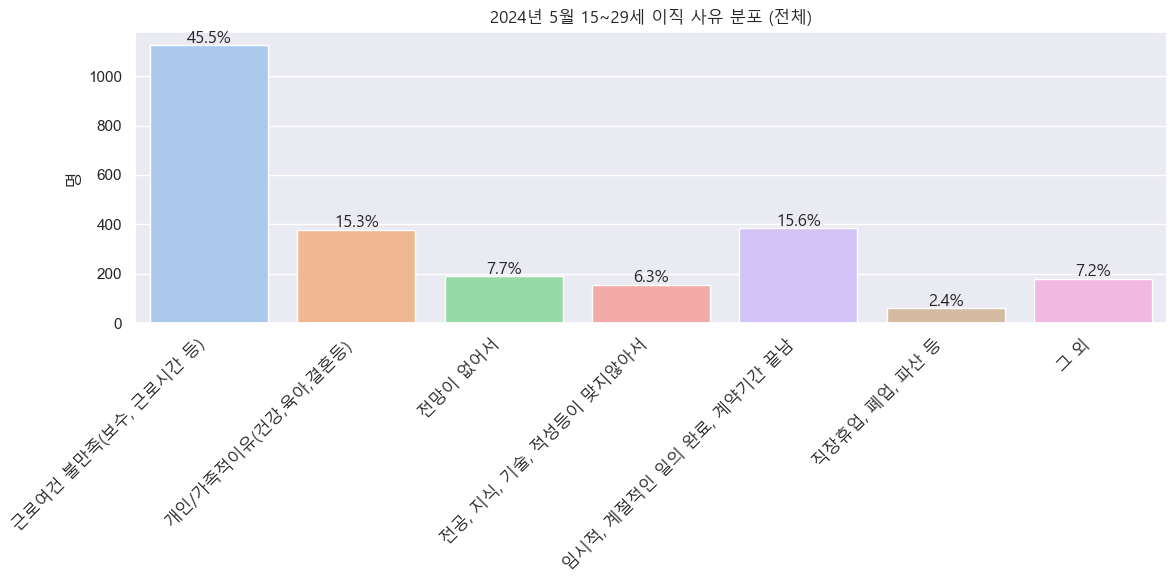

In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 폰트 설정 (깨짐 방지)
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 사유명 + 값
labels = df.iloc[0, -7:].values
values = filtered_df.iloc[0, -7:].astype(int).values
total = values.sum()

# 그래프
sns.set()
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=labels, y=values, palette="pastel")

# 퍼센트 표시
for bar, count in zip(bars.patches, values):
    percent = count / total * 100
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y + 10, f"{percent:.1f}%", ha='center', fontproperties=fontprop)

# 기타 시각 요소
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)
plt.title("2024년 5월 15~29세 이직 사유 분포 (전체)", fontproperties=fontprop)
plt.ylabel("명", fontproperties=fontprop)
plt.tight_layout()
plt.show()
